<a href="https://colab.research.google.com/github/la26092002/API_Blog_express_Mongodb/blob/main/RandomForest_vit_Features_Optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = "/content/drive/My Drive/TumorLung/vit_transformed_features_with_labels.csv"

# Read the CSV file
df = pd.read_csv(file_path, dtype="float32")

# Display the first few rows
print(df.head())
print(f"Number of rows: {df.shape[0]}")


Mounted at /content/drive
          0         1         2         3         4         5         6  \
0  0.564930 -1.140411  1.460150  1.468314 -1.964789 -0.910252  1.962049   
1  0.392160 -1.025755  1.152845  1.815159 -2.268828 -0.575702  1.920061   
2  0.578260 -1.754313 -0.115324  1.076546 -0.210810  0.944778  1.213526   
3  0.501081 -1.716666  1.142480  1.718716 -2.121823 -0.336776  2.294117   
4 -0.497193 -0.667180  0.785770  0.187510 -3.301338  0.012094  1.720640   

          7         8         9  ...       759       760       761       762  \
0  0.798698 -2.155947  1.989068  ... -0.797699  1.572167 -0.357399 -0.307872   
1  1.122042 -2.100041  1.290455  ... -0.180521  0.990616 -0.929479 -0.324597   
2  1.811926 -0.216948  0.185334  ... -1.403681  0.498354  0.802023 -0.746214   
3  1.207082 -0.955050  1.976180  ... -0.220839  0.434873 -0.631197  0.279258   
4  2.279932  0.730892 -0.147878  ... -0.151294  1.070998 -2.020089 -0.127825   

        763       764       765       766 

In [2]:
!pip install pyswarm scikit-learn pandas numpy


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=f938155a470f5b6dd7426a7431996525efee76df32e4e61d4047ba049ebf7d17
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pyswarm import pso



# Separate features and labels
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target variable

# Convert to NumPy array
X = np.array(X)
y = np.array(y)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the fitness function for PSO
def fitness_function(selected_features):
    selected_features = np.round(selected_features).astype(int)  # Convert to binary (0 or 1)
    selected_indices = np.where(selected_features == 1)[0]  # Get selected feature indices

    if len(selected_indices) == 0:  # Prevent empty selection
        return 1.0  # Worst score (higher = worse)

    # Reduce dataset to selected features
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Train a classifier (Random Forest)
    clf = RandomForestClassifier(n_estimators=50, random_state=42)
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)

    # Return the error (1 - accuracy)
    return 1 - accuracy_score(y_test, y_pred)

# Define number of features to select (e.g., 100 features)
num_features = X.shape[1]
num_selected = 100  # You can change this number

# Set up PSO optimization
lb = [0] * num_features  # Lower bound (0 = not selected)
ub = [1] * num_features  # Upper bound (1 = selected)

best_solution, _ = pso(fitness_function, lb, ub, swarmsize=20, maxiter=10)

# Get selected feature indices
selected_features = np.round(best_solution).astype(int)
selected_indices = np.where(selected_features == 1)[0]

# Extract optimized features
X_optimized = X[:, selected_indices]

# Convert to DataFrame and save as CSV
df_optimized = pd.DataFrame(X_optimized)
df_optimized['Label'] = y  # Add labels back

# Save to Google Drive
optimized_file_path = "/content/drive/My Drive/TumorLung/vit_Features_Optimized.csv"
df_optimized.to_csv(optimized_file_path, index=False)

print(f"Optimized dataset saved to: {optimized_file_path}")


Stopping search: maximum iterations reached --> 10
Optimized dataset saved to: /content/drive/My Drive/TumorLung/vit_Features_Optimized.csv


In [4]:
import pandas as pd

# Charger le fichier optimisé
optimized_file_path = "/content/drive/My Drive/TumorLung/vit_Features_Optimized.csv"
df_optimized = pd.read_csv(optimized_file_path)

# Afficher les premières lignes
print(df_optimized.head())


          0         1         2         3         4         5         6  \
0 -1.140411 -1.964789  0.798698 -2.155947 -0.945677  0.936909  1.042370   
1 -1.025755 -2.268828  1.122042 -2.100041 -0.194635  0.227794  1.553457   
2 -1.754313 -0.210810  1.811926 -0.216948  1.164743 -1.427835 -0.282339   
3 -1.716666 -2.121823  1.207082 -0.955049 -0.874546 -0.957081  2.649779   
4 -0.667180 -3.301338  2.279931  0.730892  0.632959 -1.591702  1.859996   

          7         8         9  ...       385       386       387       388  \
0 -2.057215 -0.353371 -0.531004  ...  0.523980 -1.058251 -0.381067 -1.552148   
1 -2.453968 -0.885358 -0.460428  ...  0.445284 -0.433655 -0.427602 -1.815494   
2 -1.474605 -0.862015  2.601501  ... -1.266855 -0.463105  0.176470 -1.321640   
3 -2.434221 -0.923525 -0.555890  ...  1.075705  0.078660 -0.172156 -1.370814   
4 -2.305967 -0.056118  0.932246  ... -1.398960  1.638012  0.004351 -0.819616   

        389       390       391       392       393  Label  
0  0.13

📌 1. Feature Count Comparison


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


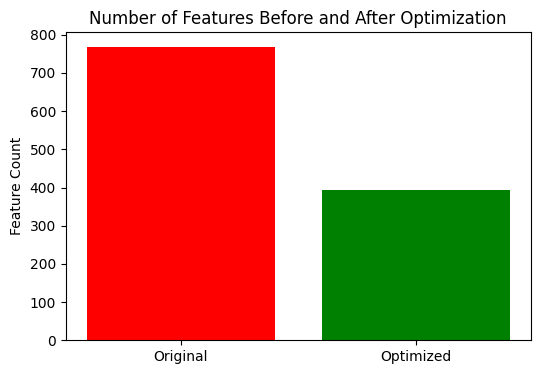

Original Features: 768
Optimized Features: 394


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Load both datasets
original_path = df
optimized_path = df_optimized

df_original = df
df_optimized = df_optimized

# Count features (excluding label column)
num_original_features = df_original.shape[1] - 1
num_optimized_features = df_optimized.shape[1] - 1

# Plot comparison
plt.figure(figsize=(6, 4))
plt.bar(["Original", "Optimized"], [num_original_features, num_optimized_features], color=['red', 'green'])
plt.title("Number of Features Before and After Optimization")
plt.ylabel("Feature Count")
plt.show()

print(f"Original Features: {num_original_features}")
print(f"Optimized Features: {num_optimized_features}")


📌 2. Feature Distribution Comparison


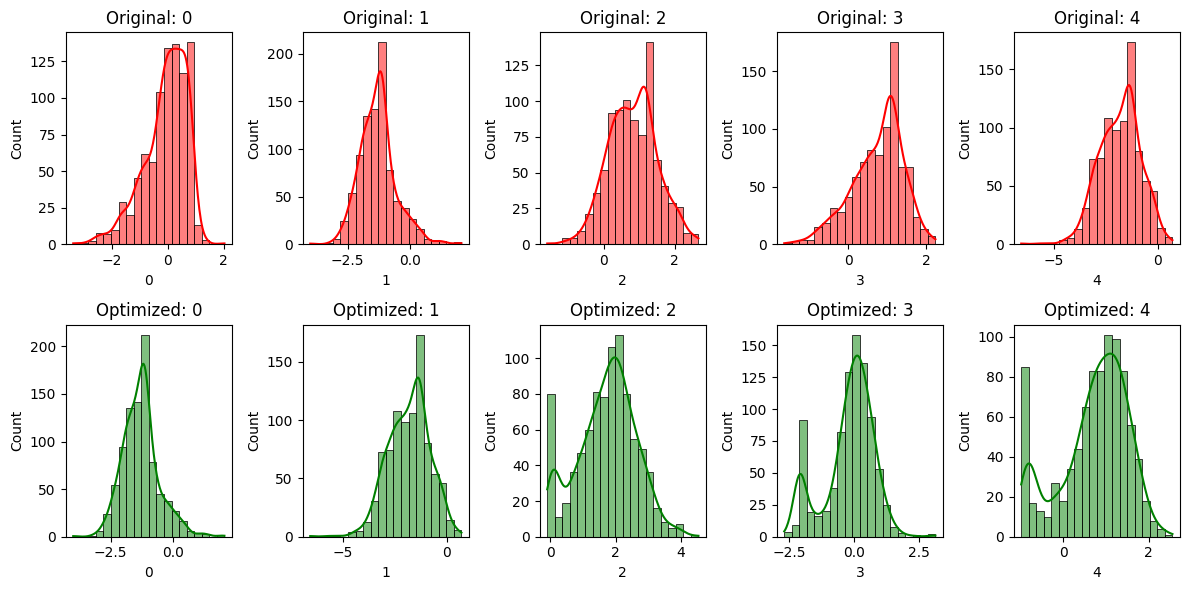

In [7]:
import seaborn as sns

# Select first few features to compare
num_features_to_compare = 5
original_subset = df_original.iloc[:, :num_features_to_compare]
optimized_subset = df_optimized.iloc[:, :num_features_to_compare]

# Plot distribution
plt.figure(figsize=(12, 6))
for i in range(num_features_to_compare):
    plt.subplot(2, num_features_to_compare, i+1)
    sns.histplot(original_subset.iloc[:, i], bins=20, color="red", kde=True)
    plt.title(f"Original: {original_subset.columns[i]}")

    plt.subplot(2, num_features_to_compare, num_features_to_compare + i+1)
    sns.histplot(optimized_subset.iloc[:, i], bins=20, color="green", kde=True)
    plt.title(f"Optimized: {optimized_subset.columns[i]}")

plt.tight_layout()
plt.show()


📌 3. Correlation Heatmap


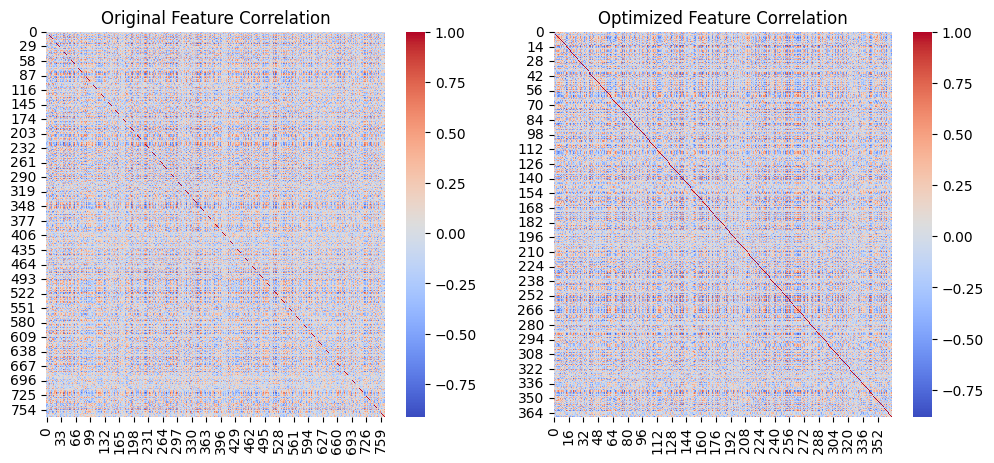

In [ ]:
import numpy as np

# Compute correlation matrices
corr_original = df_original.iloc[:, :-1].corr()
corr_optimized = df_optimized.iloc[:, :-1].corr()

# Plot heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(corr_original, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Original Feature Correlation")

plt.subplot(1, 2, 2)
sns.heatmap(corr_optimized, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Optimized Feature Correlation")

plt.show()


📌 4. Model Performance Comparison


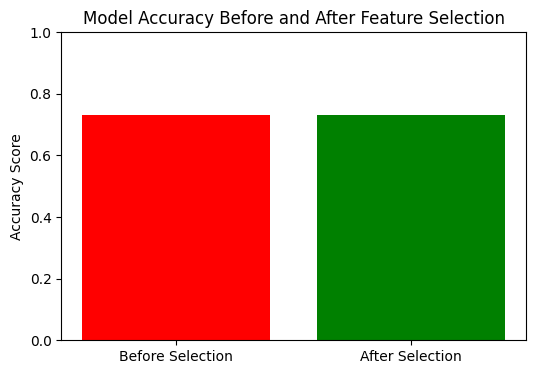

Original Model Accuracy: 0.7303
Optimized Model Accuracy: 0.7303


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split datasets
X_original = df_original.drop(columns=['Label'])
y_original = df_original['Label']

X_optimized = df_optimized.drop(columns=['Label'])
y_optimized = df_optimized['Label']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_optimized, y_optimized, test_size=0.2, random_state=42)

# Train classifiers
clf_orig = RandomForestClassifier(n_estimators=50, random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = clf_orig.predict(X_test_orig)
acc_orig = accuracy_score(y_test_orig, y_pred_orig)

clf_opt = RandomForestClassifier(n_estimators=50, random_state=42)
clf_opt.fit(X_train_opt, y_train_opt)
y_pred_opt = clf_opt.predict(X_test_opt)
acc_opt = accuracy_score(y_test_opt, y_pred_opt)

# Plot results
plt.figure(figsize=(6, 4))
plt.bar(["Before Selection", "After Selection"], [acc_orig, acc_opt], color=['red', 'green'])
plt.title("Model Accuracy Before and After Feature Selection")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.show()

print(f"Original Model Accuracy: {acc_orig:.4f}")
print(f"Optimized Model Accuracy: {acc_opt:.4f}")


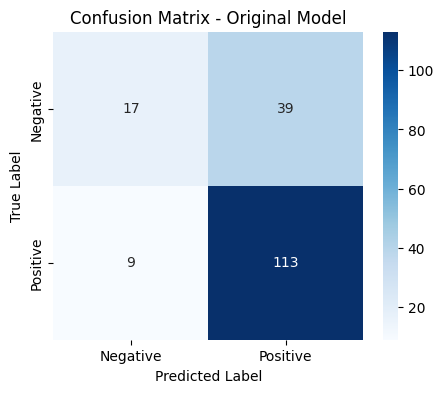

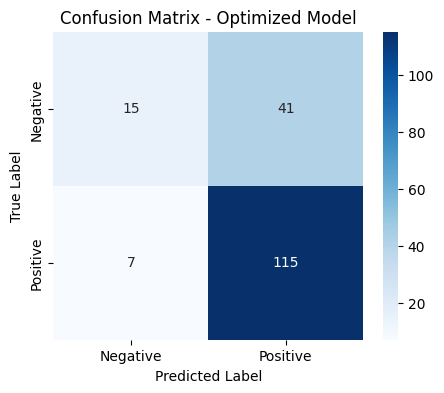

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
cm_opt = confusion_matrix(y_test_opt, y_pred_opt)

# Plot function
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot both matrices
plot_confusion_matrix(cm_orig, "Confusion Matrix - Original Model")
plot_confusion_matrix(cm_opt, "Confusion Matrix - Optimized Model")


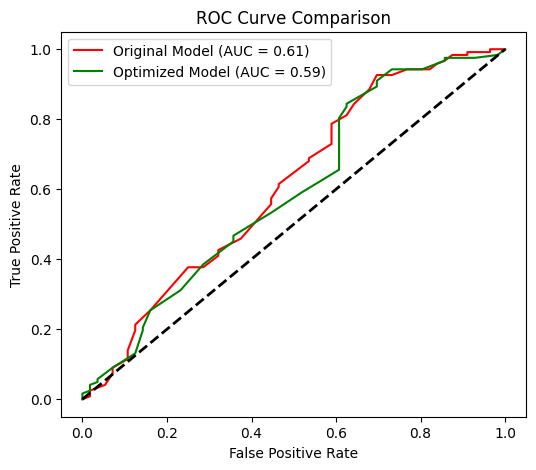

In [10]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for original model
fpr_orig, tpr_orig, _ = roc_curve(y_test_orig, clf_orig.predict_proba(X_test_orig)[:, 1])
roc_auc_orig = auc(fpr_orig, tpr_orig)

# Compute ROC curve and AUC for optimized model
fpr_opt, tpr_opt, _ = roc_curve(y_test_opt, clf_opt.predict_proba(X_test_opt)[:, 1])
roc_auc_opt = auc(fpr_opt, tpr_opt)

# Plot ROC curves
plt.figure(figsize=(6, 5))
plt.plot(fpr_orig, tpr_orig, label=f'Original Model (AUC = {roc_auc_orig:.2f})', color='red')
plt.plot(fpr_opt, tpr_opt, label=f'Optimized Model (AUC = {roc_auc_opt:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


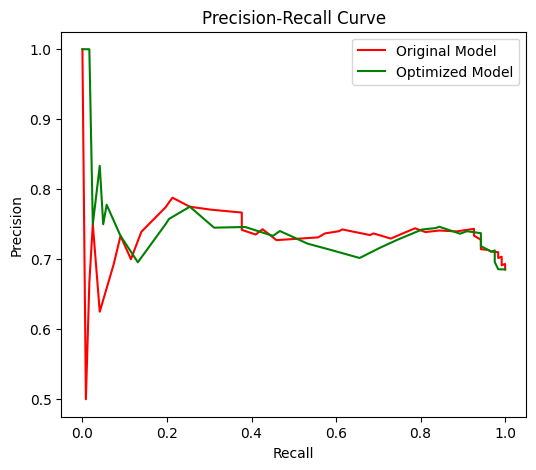

In [11]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall for original model
precision_orig, recall_orig, _ = precision_recall_curve(y_test_orig, clf_orig.predict_proba(X_test_orig)[:, 1])

# Compute Precision-Recall for optimized model
precision_opt, recall_opt, _ = precision_recall_curve(y_test_opt, clf_opt.predict_proba(X_test_opt)[:, 1])

# Plot Precision-Recall Curves
plt.figure(figsize=(6, 5))
plt.plot(recall_orig, precision_orig, label="Original Model", color='red')
plt.plot(recall_opt, precision_opt, label="Optimized Model", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


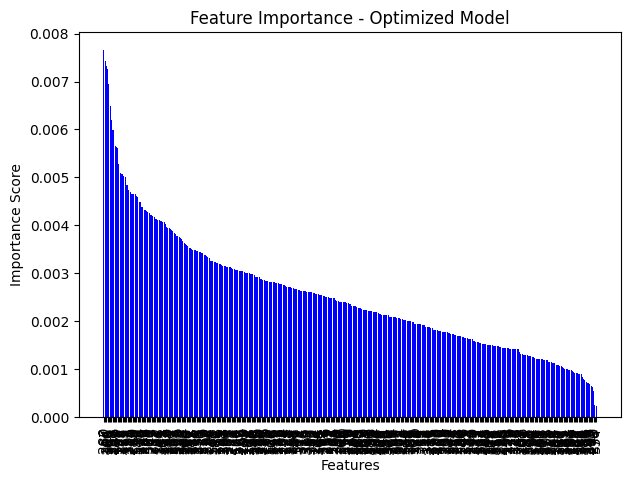

In [12]:
import numpy as np

# Get feature importance from optimized model
importances = clf_opt.feature_importances_
features = X_optimized.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(7, 5))
plt.bar(range(len(features)), importances[indices], align="center", color="blue")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Optimized Model")
plt.show()


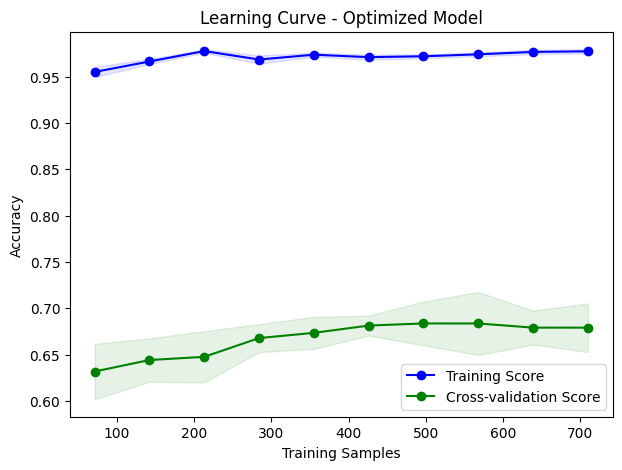

In [13]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf_opt, X_optimized, y_optimized, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and std deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(7, 5))
plt.plot(train_sizes, train_mean, "o-", label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, "o-", label="Cross-validation Score", color="green")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Optimized Model")
plt.legend()
plt.show()


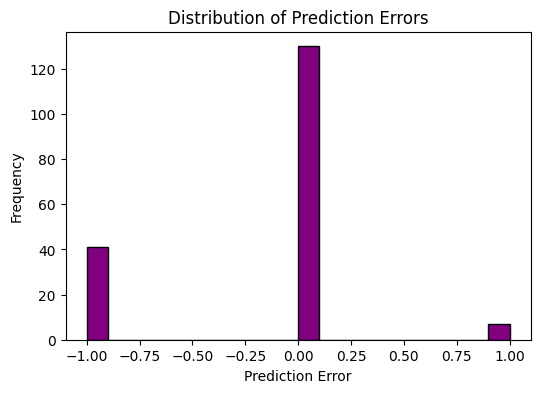

In [14]:
import numpy as np

errors = y_test_opt - y_pred_opt  # Difference between true & predicted values

plt.figure(figsize=(6, 4))
plt.hist(errors, bins=20, color="purple", edgecolor="black")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()
